In [5]:
#!pip3 install pyvis --break-system-packages
#!pip3 install community --break-system-packages
!pip3 install python-louvain --break-system-packages



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha256=66063bca050ee21db05aed4a652be931f610f8f322c2598844e4a6ef73ecd6ef
  Stored in directory: /Users/kucukkgl/Library/Caches/pip/wheels/40/f1/e3/485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python-louvain

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [11]:
# Function to generate a random Class C private IP address (192.168.0.0 to 192.168.255.255)
def generate_random_class_c_ip():
    start_ip = ipaddress.IPv4Address('192.168.0.0')
    end_ip = ipaddress.IPv4Address('192.168.255.255')
    
    # Generate a random IP in the Class C private range
    return str(ipaddress.IPv4Address(random.randint(int(start_ip), int(end_ip))))


In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import ipaddress
import random
import community.community_louvain as community_louvain
from pyvis.network import Network

# Create an empty graph
G = nx.Graph()

# Add nodes with random IP addresses
num_nodes = 50
for _ in range(num_nodes):
    random_ip = generate_random_class_c_ip()
    G.add_node(random_ip)

# Add sparse random edges
edge_creation_probability = 0.2
for node1 in G.nodes:
    for node2 in G.nodes:
        if node1 != node2 and random.random() < edge_creation_probability:
            G.add_edge(node1, node2)

# Detect communities using the Louvain algorithm
partition = community_louvain.best_partition(G)

# Create a PyVis network object
network_visualization = Network(notebook=True)

# Add nodes and edges to the PyVis network
for node in G.nodes:
    network_visualization.add_node(node, title=node, color=partition[node])

for edge in G.edges:
    network_visualization.add_edge(edge[0], edge[1])

# Set the Force Atlas 2 layout and display the network
network_visualization.show_buttons(filter_=['nodes', 'edges', 'physics'])
network_visualization.force_atlas_2based()
file_path = "community_graph_privacy.html"
network_visualization.show(file_path)



community_graph_privacy.html


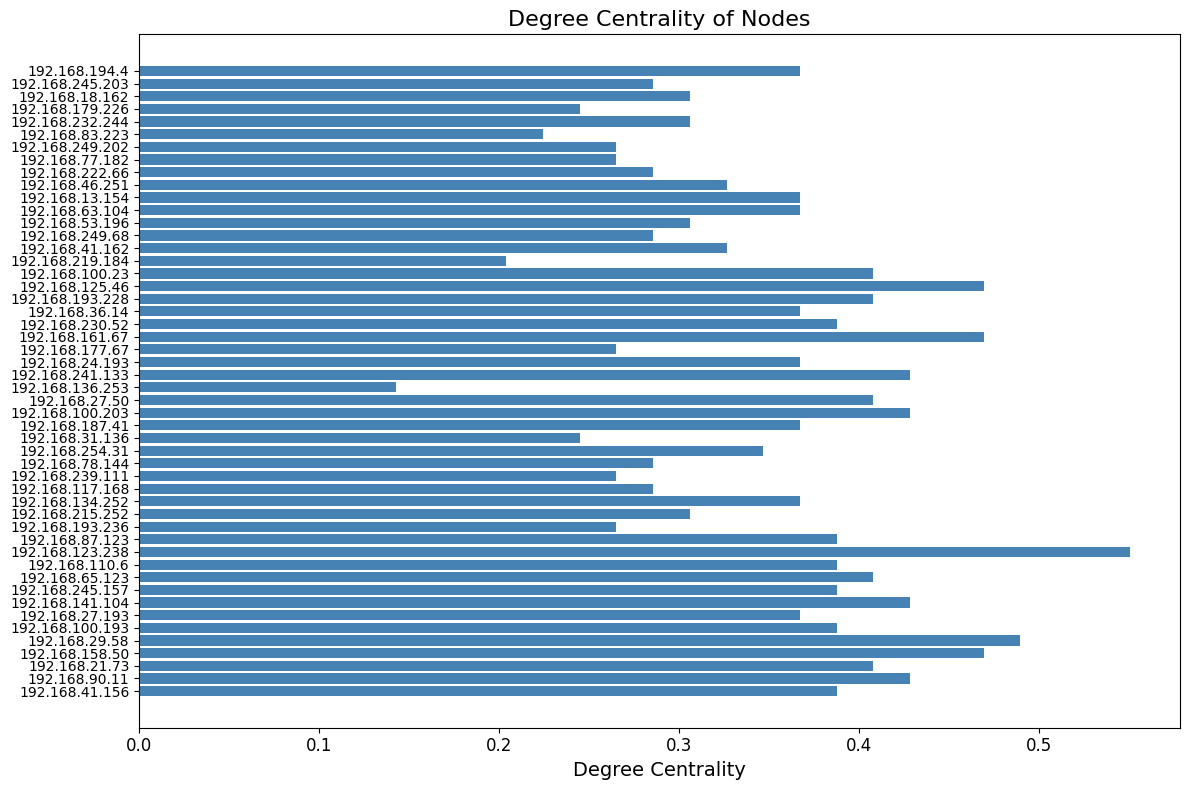

In [15]:
# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Extract nodes and their degree centralities
nodes = list(degree_centrality.keys())
centralities = list(degree_centrality.values())

# Create a bar graph of degree centrality
plt.figure(figsize=(12, 8))  # Increased size for better visibility
plt.barh(nodes, centralities, color='steelblue')  # Darker color
plt.xlabel('Degree Centrality', fontsize=14)
plt.title('Degree Centrality of Nodes', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.xticks(fontsize=12)  # Increase font size for x-axis
plt.yticks(fontsize=10)  # Increase font size for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [14]:
import csv
# Create a list of tuples with (Node 1, Node 2)
data = [(node1, node2) for node1, node2 in G.edges]

# Export data to a CSV file
with open('generated_ips_privacy.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['ip_src', 'ip_dest'])  # Header
    csv_writer.writerows(data)
